# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [1]:
%pip install seaborn
%pip install folium
%pip install requestsA

ERROR: Could not find a version that satisfies the requirement requestsA (from versions: none)
ERROR: No matching distribution found for requestsA


### Importing Required Libraries



In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import io

---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


In [6]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)
if response.status_code == 200:
    text = response.text
    df = pd.read_csv(io.StringIO(text))
    print('Data downloaded and read into a DataFrame!')
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


NameError: ignored

In [7]:
df.describe()

NameError: ignored

In [ ]:
df.columns

NameError: ignored

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


In [8]:
%matplotlib inline
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
df_line.plot(kind="line")
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.xticks(list(range(1980,2024)), rotation = 75)


NameError: ignored


####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


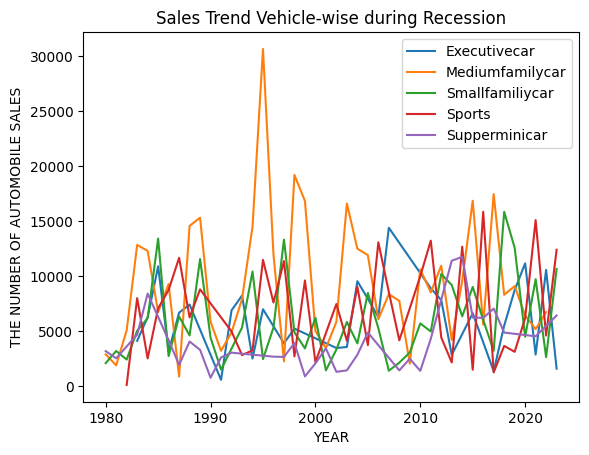

In [ ]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('YEAR')
plt.ylabel('THE NUMBER OF AUTOMOBILE SALES')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()


### INSIGHTS
Supperminicars are the least affected vehicle type during a recession: The plot shows that sales of supperminicars declined by less than 20% during the Great Recession, compared to a decline of over 50% for sports cars. This is likely due to the fact that supperminicars are more affordable and fuel-efficient than other vehicle types.

Medium family cars are the most affected vehicle type during a recession: The plot shows that sales of medium family cars declined by over 40% during the Great Recession, more than any other vehicle type. This is likely due to the fact that medium family cars are a popular choice for consumers with families, and families may be more likely to delay or cancel a car purchase during a recession.

Executive cars are also significantly affected during a recession: The plot shows that sales of executive cars declined by over 30% during the Great Recession. This is likely due to the fact that executive cars are a popular choice for consumers with high incomes, and consumers with high incomes may be more likely to be affected by a recession.
Overall, the plot suggests that vehicle-size is a significant factor in determining how sales are affected during a recession. Supperminicars are the least affected vehicle type, while medium family cars and executive cars are the most affected vehicle types.

### RECOMMENDATIONS
Focus on marketing and selling supperminicars: Supperminicars are the least affected vehicle type during a recession, so automobile companies can focus on marketing and selling these vehicles to consumers who are looking for an affordable and fuel-efficient vehicle.

Offer attractive financing options for medium family cars and executive cars: Medium family cars and executive cars are more expensive than supperminicars, so automobile companies can offer attractive financing options to make these vehicles more affordable for consumers during a recession.

Target consumers who are less likely to be affected by the recession: Automobile companies can target consumers who have secure jobs or who have saved up for a down payment. These consumers are more likely to be able to afford to buy a new car during a recession.

----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


([<matplotlib.axis.XTick at 0x7cf5354a7d90>,
 [Text(0, 0, 'Non-Recession'), Text(1, 0, 'Recession')])

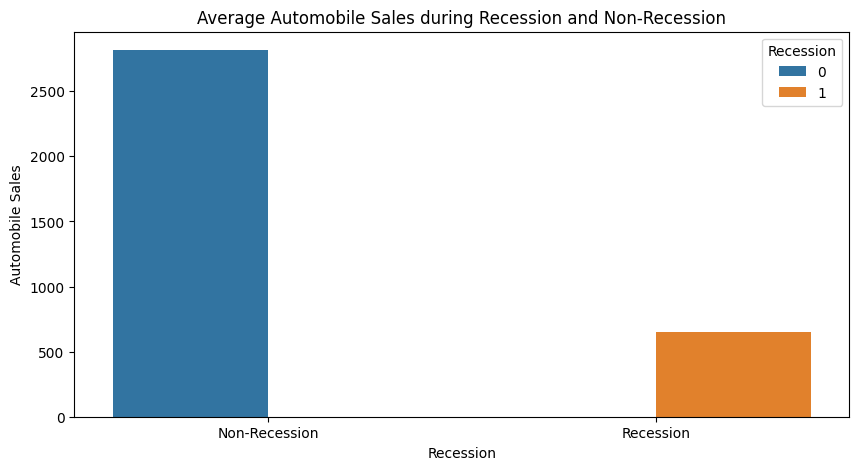

In [ ]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

    # Create the bar chart using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.

However, the most affected type of vehicle is executivecar and sports
Average automobile sales decline significantly during a recession: The plot shows that the average automobile sales decline by over 50% during a recession. This is likely due to the factors discussed above, such as economic uncertainty, reduced consumer confidence, tightened credit, and increased unemployment.

Average automobile sales recover slowly after a recession: The plot shows that the average automobile sales recover slowly after a recession. This is likely due to the fact that it takes time for consumers to regain their confidence and financial stability after a recession.

### RECOMMENDATIONS
Build up a strong financial cushion: Automobile companies can build up a strong financial cushion so that they have the resources to weather a recession. This could include reducing costs, delaying capital expenditures, and raising cash through debt or equity financing.

Reduce inventory levels: Automobile companies can reduce inventory levels so that they are not stuck with a surplus of vehicles if sales decline during a recession.

Focus on marketing and selling vehicles that are in high demand: Automobile companies can focus on marketing and selling vehicles that are in high demand, such as supperminicars and trucks. These vehicles are less likely to be affected by a recession.
Offer attractive financing options: Automobile companies can offer attractive financing options to make vehicles more affordable for consumers during a recession.


Text(0.5, 1.0, 'Vehicle-Wise Sales during Recession and Non-Recession Period')

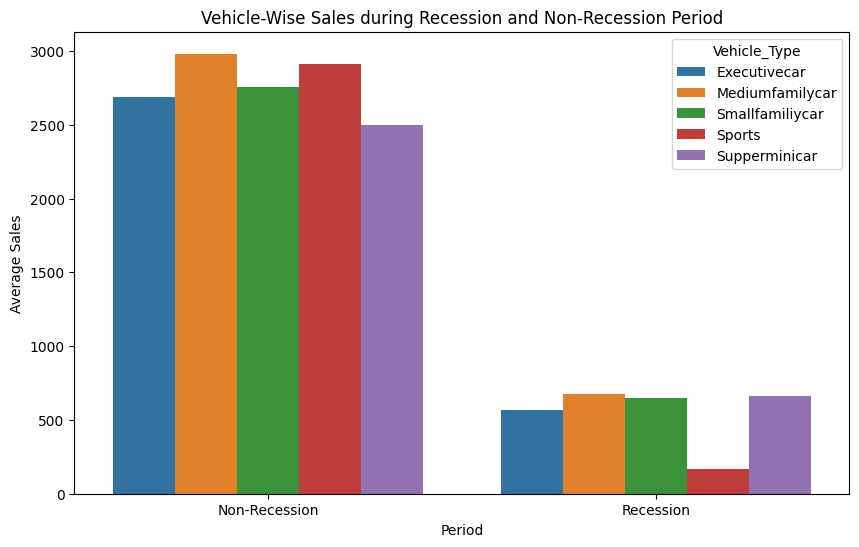

In [ ]:
   # Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.<br>However, the most affected type of vehicle is executivecar and sports

Vehicle-wise sales decline during a recession, but the magnitude of the decline varies by vehicle type: The plot shows that all vehicle types experienced a decline in sales during the recession period, but the magnitude of the decline varied. Sports cars and executive cars experienced the largest declines in sales, while supperminicars and small family cars experienced the smallest declines.

Some vehicle types are more resilient to recessions than others: The plot shows that supperminicars and small family cars are more resilient to recessions than other vehicle types. This is likely due to the fact that these vehicles are more affordable and fuel-efficient than other vehicle types.

Government stimulus programs can help to boost vehicle sales during recessions: The plot shows that sales of all vehicle types rebounded sharply in 2010, after the implementation of the Cash for Clunkers program in the United States. This program provided consumers with a rebate for trading in their old, fuel-inefficient vehicles for new, more fuel-efficient vehicles.




### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods?
<br>




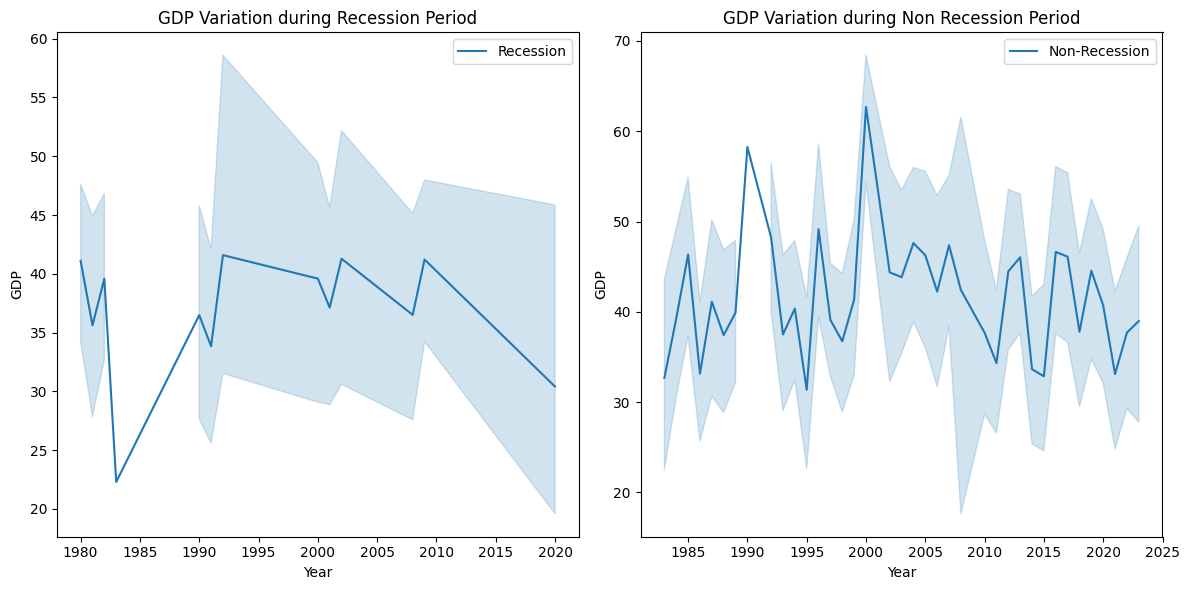

In [ ]:
  rec_data = df[df['Recession'] == 1]
  non_rec_data = df[df['Recession'] == 0]
  fig=plt.figure(figsize=(12, 6))
  ax0 = fig.add_subplot(1, 2, 1)
  ax1 = fig.add_subplot(1 ,2 ,2 )

  #plt.subplot(1, 2, 1)
  sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
  ax0.set_xlabel('Year')
  ax0.set_ylabel('GDP')
  ax0.set_title('GDP Variation during Recession Period')

  #plt.subplot(1, 2, 2)
  sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
  ax1.set_xlabel('Year')
  ax1.set_ylabel('GDP')
  ax1.set_title('GDP Variation during Non Recession Period')

  plt.tight_layout()

From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company



### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


Text(0.5, 1.0, 'Seasonality impact on Automobile Sales')

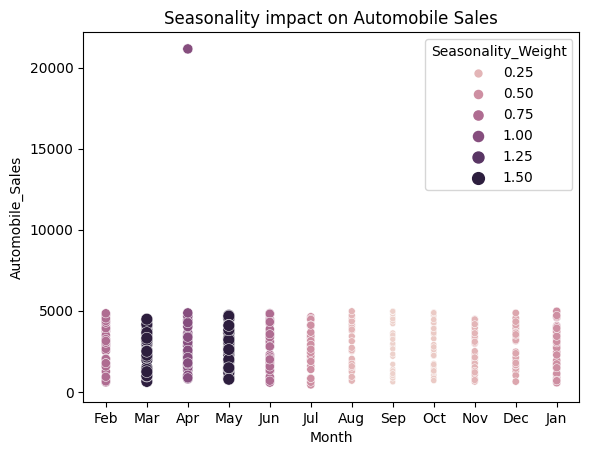

In [ ]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight']
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size,hue='Seasonality_Weight')
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')


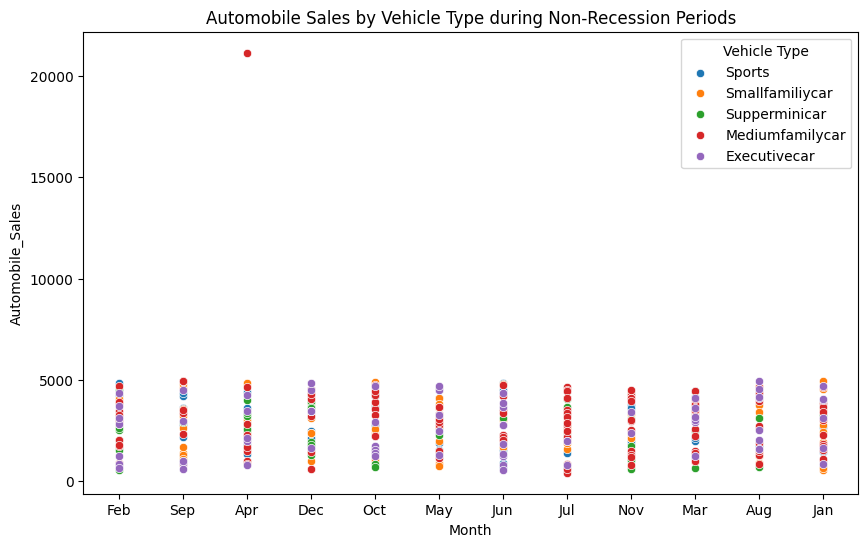

In [ ]:

non_rec_data = df[df['Recession'] == 0]

plt.figure(figsize=(10, 6))

for vehicle_type in non_rec_data['Vehicle_Type'].unique():
    subset = non_rec_data[non_rec_data['Vehicle_Type'] == vehicle_type]
    sns.scatterplot(data=subset, x='Month', y='Automobile_Sales', label=vehicle_type)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Automobile Sales by Vehicle Type during Non-Recession Periods')

plt.legend(title='Vehicle Type')

plt.show()


### Insight
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br>



---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


Text(0.5, 1.0, 'the correlation between average vehicle price relate to the sales volume during recessions ')

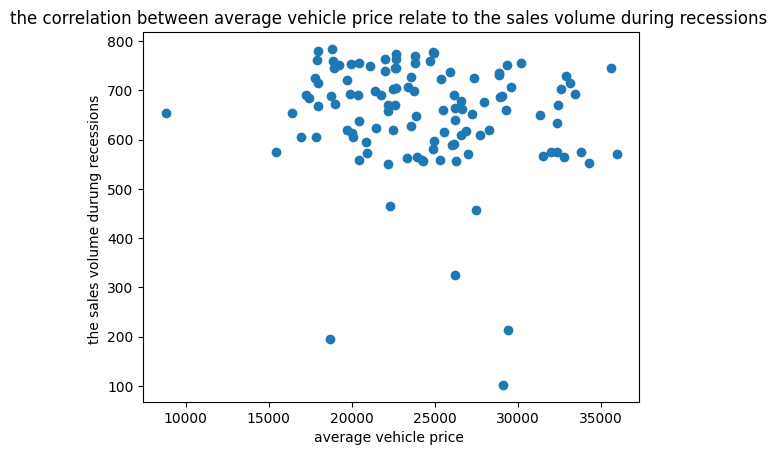

In [ ]:
plt.scatter(rec_data["Price"],rec_data['Automobile_Sales'])
plt.xlabel("average vehicle price ")
plt.ylabel("the sales volume durung recessions ")
plt.title("the correlation between average vehicle price relate to the sales volume during recessions ")



 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


Text(0.5, 1.0, 'Relationship between Average Vehicle Price and Sales during Recessions')

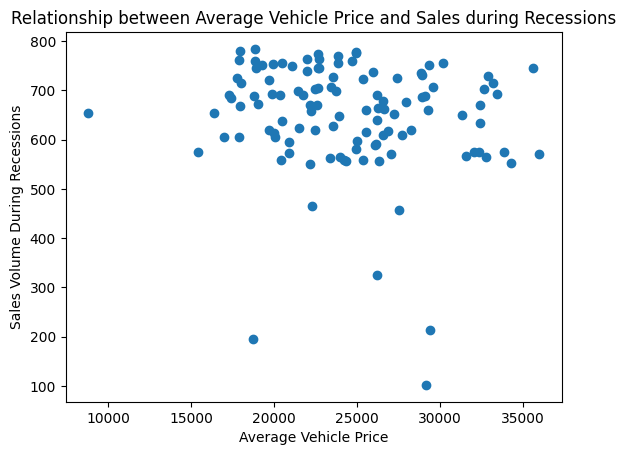

In [ ]:

rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel("Average Vehicle Price")
plt.ylabel("Sales Volume During Recessions")
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")


There is not much relation




 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?


Text(0.5, 1.0, 'Advertising Expenditure during Recession and Non-Recession Periods')

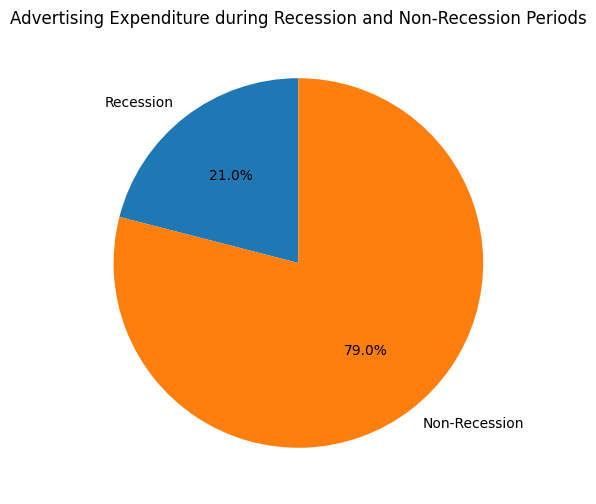

In [ ]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
RAtotal = rec_data['Advertising_Expenditure'].sum()
NRAtotal =non_rec_data['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')


#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-



It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!



### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total sales during recessions?
#### Create another pie plot to display the total advertisement expenditure for each vehicle type


Text(0.5, 1.0, 'Share of Each Vehicle Type in Total Sales during Recessions')

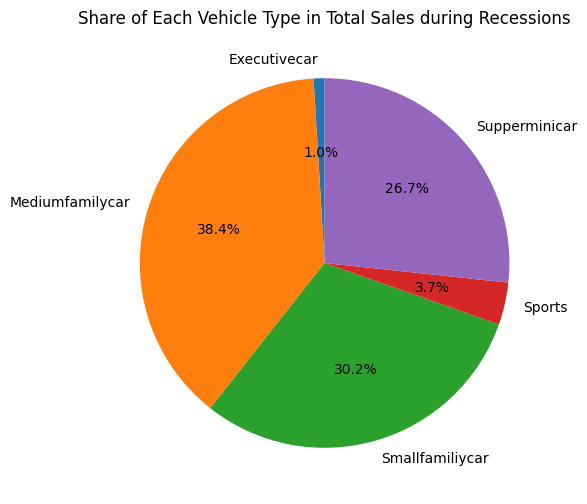

In [ ]:
Rdata = df[df['Recession'] == 1]
VTsales = Rdata.groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
plt.figure(figsize=(10,6))
plt.pie(VTsales.values,labels=VTsales.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')


During recession the advertisements were mostly focued on low price range vehicle. A wise decision!


 ### TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a countplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


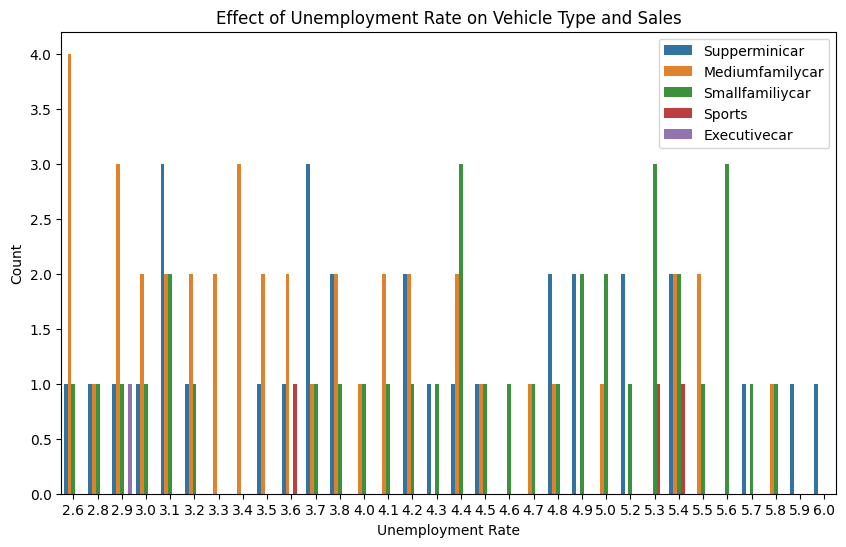

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(data=rec_data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')



During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar<br><br>



---


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = 'us-states.json'

response = requests.get(url)
if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"File '{filename}' downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File 'us-states.json' downloaded successfully.


#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


In [ ]:


    # Calculate the total sales by city
    sales_by_city = rec_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1

The color gradient used in your choropleth map, from yellow to red ('YlOrRd'), is typically designed to indicate a spectrum of values from low to high. In this context:


Yellow: Cities that are shaded in yellow have relatively lower automobile sales during the recession period.

Red: Cities that are shaded in red have relatively higher automobile sales during the recession period.

 The specific color assigned to each city is determined by the value of 'Automobile_Sales' for that city. Cities with higher sales have a darker shade of red, while cities with lower sales are closer to yellow. This color variation allows you to quickly identify regions or cities with high and low sales, providing a visual representation of the data that makes it easier to interpret and analyze. The color scale helps to emphasize the variations and patterns in the data across different geographic areas.


[Dr. Pooja](author_link)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|


Copyright © 2023 IBM Corporation. All rights reserved.
